In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# inspecter les données
train.info()
train.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


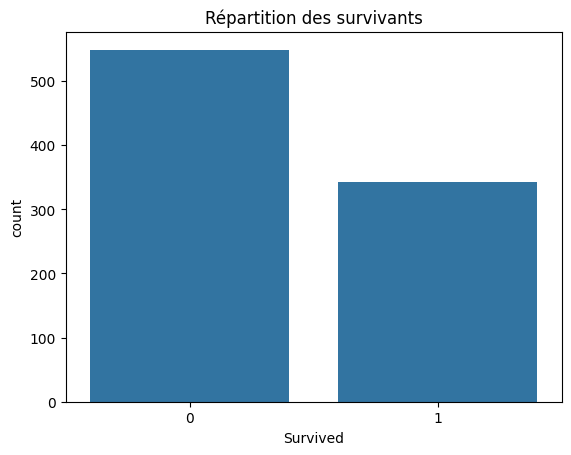

In [124]:
#import seaborn as sns
import matplotlib.pyplot as plt
#combien de survivants vs non-survivants
sns.countplot(x='Survived', data=train)
plt.title('Répartition des survivants')
plt.show()
#sns.countplot : crée un graphique de comptage pour la colonne « Survived » dans le DataFrame du train.
#plt.title : ajoute le titre « Répartition des survivants » au graphique.

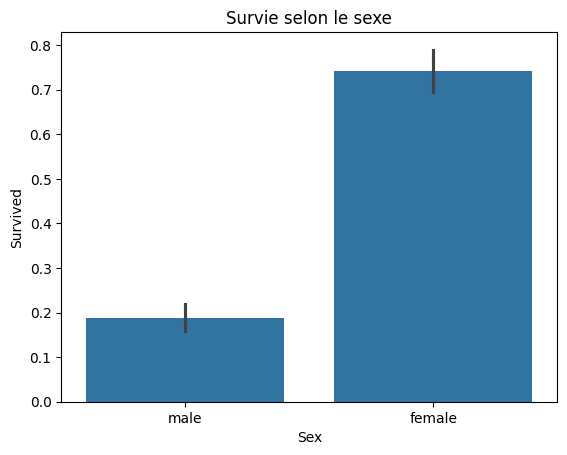

In [125]:
# survie selon de variable
# selon variable sex
sns.barplot(x='Sex', y='Survived', data=train)
plt.title("Survie selon le sexe")
plt.show()

Questions à analyser  :

Pourqoui les femmes ont-elles eu un taux de survie plus élevé que les hommes ?
- Oui, les femmes ont eu un taux de survie plus élevé que les hommes.

Peut-on dire que le sexe est un facteur important dans la survie ?
- Oui, le sexe est un facteur important dans la survie des passagers.

Est-ce que la variable Sex est discriminante pour un modèle prédictif ?
- Oui, la variable Sex est discriminante dans un modèle prédictif.

Quelles hypothèses  expliquer ces résultats (femmes et enfants d’abord) ?
- oui peut etre 

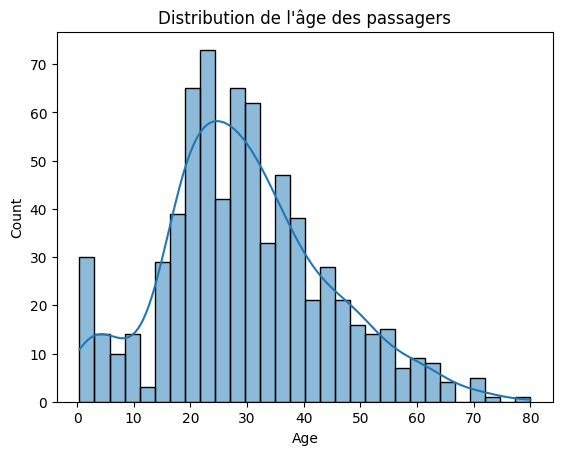

In [126]:
sns.histplot(data=train, x='Age', bins=30, kde=True)
plt.title("Distribution de l'âge des passagers")
plt.show()


l'age dans titanic :
Y a-t-il beaucoup de passagers très jeunes (enfants) ? De personnes âgées ?
- Oui, on observe une quantité non négligeable de passagers entre 0 et 10 ans

Quel est l’âge moyen et l’âge le plus fréquent ?
- Âge moyen est environ 29 ans, Âge le plus fréquent (mode) c'est  Environ 24 ans.

Y a-t-il des valeurs extrêmes (outliers) à prendre en compte ?
-  Oui, certains passagers ont plus de 70 ans, mais ils sont très peu nombreux.

La répartition semble-t-elle normale, asymétrique ou bimodale ?
- Elle est asymétrique vers la droite (plus de jeunes que de vieux), et pas tout à fait normale.

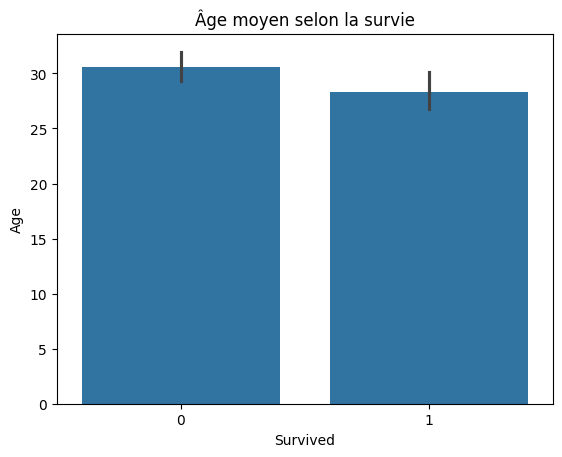

In [127]:
sns.barplot(x='Survived', y='Age', data=train)
plt.title("Âge moyen selon la survie")
plt.show()

Les survivants sont-ils en moyenne plus jeunes que les non-survivants ?
- Âge moyen des survivants est environ 28 ans, et l'age moyen des non-survivants est Environ 30 ans.

Peut-on en conclure que l'âge influence la survie ?
- on peut conclure que  L'âge n’a pas un très grand impact sur la survie en moyenne.

Cela peut-il être dû à la priorité donnée aux enfants lors de l'évacuation ?
- Les enfants très jeunes ont été parfois privilégiés, mais cela ne se reflète pas forcément dans la moyenne globale.

/tmp/ipykernel_922/772505926.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Survived'] == 1]['Age'], label='Survécu', shade=True)
/tmp/ipykernel_922/772505926.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train[train['Survived'] == 0]['Age'], label='Non survécu', shade=True)


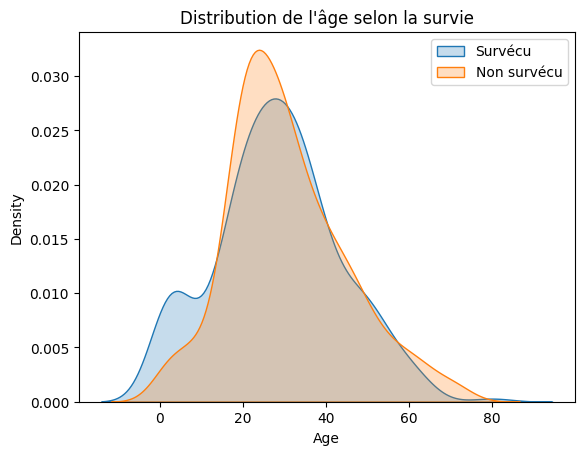

In [128]:
# (sns) : Bibliothèque Seaborn 
#kdeplot() trace une courbe de densité (KDE = Kernel Density Estimate) de la colonne Age pour les passagers qui ont survécu (Survived == 1).
#shade=True:  remplit la zone sous la courbe pour donner un effet visuel plus clair.

sns.kdeplot(train[train['Survived'] == 1]['Age'], label='Survécu', shade=True)
sns.kdeplot(train[train['Survived'] == 0]['Age'], label='Non survécu', shade=True)
plt.title("Distribution de l'âge selon la survie")
plt.legend()
plt.show()

analyse de graphique :

À quels âges observe-t-on les plus fortes densités de survie ?
- On remarque un pic de densité chez les survivants pour les Enfants autour de 5 ans et adultes jeunes entre 20–35 ans.

Les enfants (0–10 ans) ont-ils eu un meilleur taux de survie ?
- légèrement, mais ce n’est pas massif

La survie semble-t-elle favorisée dans une certaine tranche d’âge ?
- oui, Les jeunes adultes (20–35 ans).

Observe-t-on un chevauchement important entre les deux courbes ?
- Oui, les courbes se recoupent fortement. Donc l’âge seul ne permet pas de prédire facilement la survie.

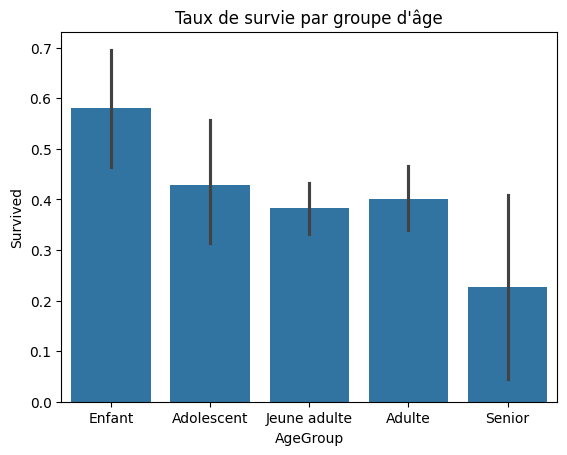

In [129]:
#Catégorisation de l’âge
#création des tranches d’âge pour voir plus clairement l’effet

train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 12, 18, 35, 60, 100], 
                           labels=['Enfant', 'Adolescent', 'Jeune adulte', 'Adulte', 'Senior'])

sns.barplot(x='AgeGroup', y='Survived', data=train)
plt.title("Taux de survie par groupe d'âge")
plt.show()


Quel groupe d’âge a le plus haut taux de survie ?
- le groupe des enfants (0–12 ans) ont le taux le plus élevé (~60%).

Groupe avec le taux le plus faible?
- Les seniors (>60 ans) ont un taux de survie très bas.

Y a-t-il une différence très marquée entre enfants et adultes ?
- Oui, les enfants sont privilégiés, les jeunes adultes et adultes ont un taux modéré (~35%), les adolescents sont au milieu (~40%).

Peut-on dire que l’âge est une variable discriminante à introduire dans le modèle ?
-Oui, l'âge est une variable intéressante, mais pas suffisante seule. Elle doit être combinée avec le sexe et la classe pour un modèle plus efficace.

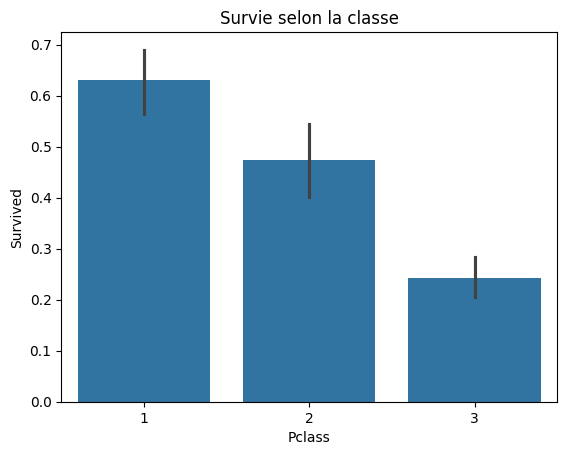

In [130]:
# selon variable Pclass
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title("Survie selon la classe")
plt.show()

Les passagers de première classe ont-ils plus survécu que ceux de 3e classe ?
- Oui, les passagers de première classe ont eu un taux de survie plus élevé que ceux de 3e classe.

Est-ce que le niveau de confort (ou la proximité avec les canots) a pu influencer le taux de survie ?
- Oui, le niveau de confort et la proximité des canots ont probablement influencé le taux de survie.

Peut-on dire que la variable Pclass est aussi importante que Sex ?
- la variable Pclass est importante mais généralement moins discriminante que Sex.

Est-ce que la variable Pclass peut être considérée comme une variable de statut socio-économique ?
- Oui, la variable Pclass reflète le statut socio-économique des passagers.

Quelles relations possibles entre les variables Sex, Pclass et Survived peut-on explorer ?

Quelles autres visualisations possible pour compléter cette analyse ? 

Comment puis-je traduire ces observations en features engineering pour améliorer mon modèle ?

1. Relations possibles entre Sex, Pclass et Survived
Ce sont trois variables très importantes dans le jeu de données Titanic. Voici les relations que tu peux explorer :

🔹 a. Sex et Survived :
Les femmes ont un taux de survie beaucoup plus élevé (~75%) que les hommes (~20%).

🔹 b. Pclass et Survived :
Les passagers de 1ère classe ont beaucoup plus survécu (~63%) que ceux de 3e classe (~24%).


🔹 c. Interaction entre Sex, Pclass et Survived :
Les femmes de 1ère classe ont un taux de survie très élevé.

Les hommes de 3e classe ont le taux de survie le plus bas.

Ces deux variables combinées sont donc très discriminantes pour la prédiction.

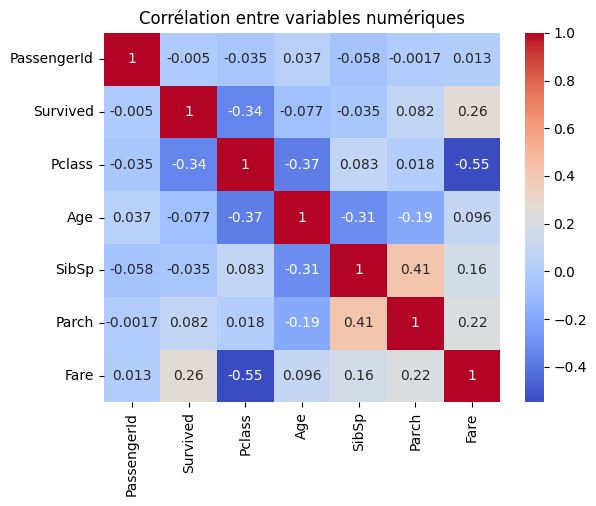

In [131]:
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Corrélation entre variables numériques")
plt.show()

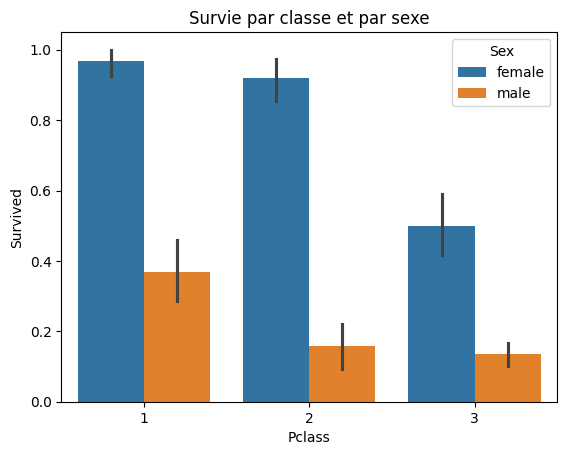

In [132]:
# Graphique croisé avec hue='Sex' : Montre comment les hommes et les femmes sont affectés dans chaque classe.
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)
plt.title("Survie par classe et par sexe")
plt.show()

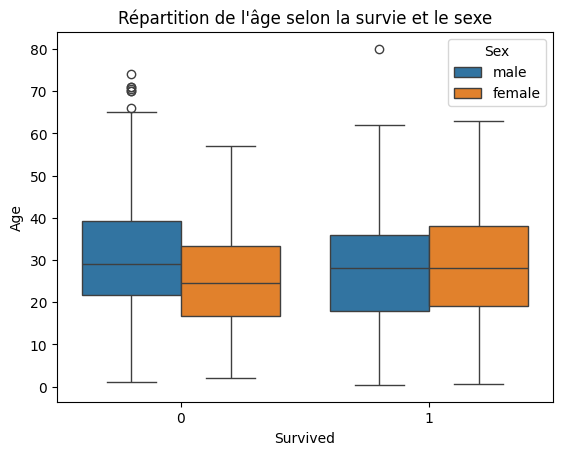

In [106]:
# voir si les femmes ou hommes d’un certain âge ont été plus protégés.
sns.boxplot(x='Survived', y='Age', hue='Sex', data=train)
plt.title("Répartition de l'âge selon la survie et le sexe")
plt.show()

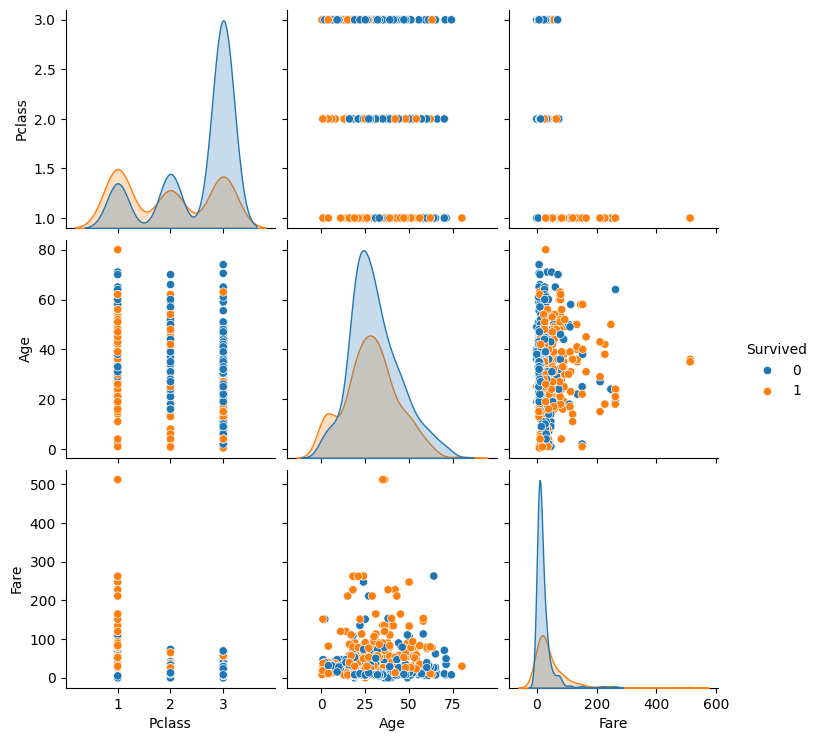

In [133]:
# pour voir  d’ensemble de la relation entre plusieurs variables.
sns.pairplot(train[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']], hue='Survived')
plt.show()

3.  depuis ces visualisations on conclure :

Les femmes et les passagers de 1ère classe ont été favorisés.

Les hommes de 3e classe ont été très désavantagés.

Les enfants (jeunes) ont eu plus de chance, mais moins que les femmes adultes de première classe.

L’âge n’est pas suffisant seul pour prédire la survie, contrairement au sexe ou à la classe.

Comment traduire cela en feature engineering ?

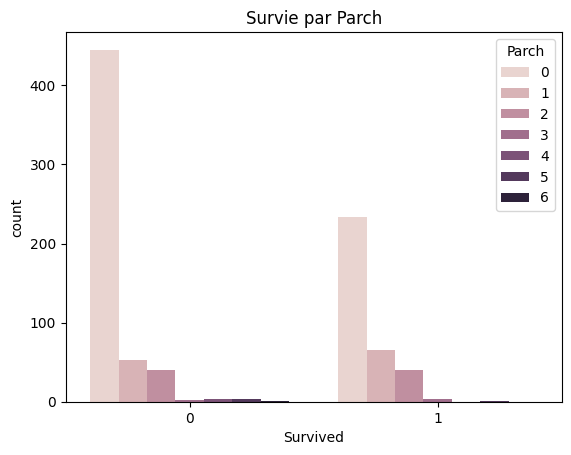

In [134]:
sns.countplot(x='Survived', hue='Parch', data=train)
plt.title('Survie par Parch')
plt.show()

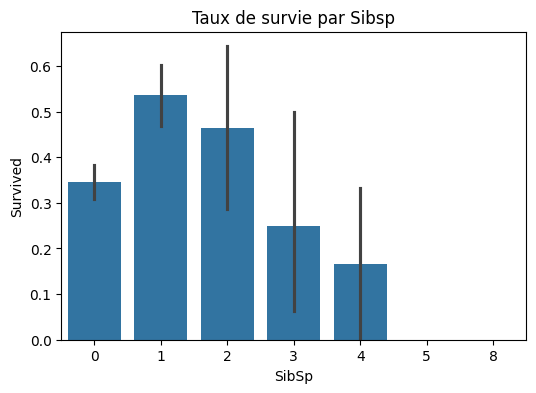

In [135]:
plt.figure(figsize=(6,4))
sns.barplot(x='SibSp', y='Survived', data=train)
plt.title("Taux de survie par Sibsp")
plt.show()

In [140]:

# le train(l’entraînement)
# Traitement des valeurs manquantes: fillna()
# Remplacer les valeurs manquantes dans la colonne Age
#La médiane est moins sensible aux valeurs extrêmes (outliers) que la moyenne.
#La médiane est une mesure statistique qui représente la valeur centrale d’une série de données triée dans l’ordr croi ou décroi
# inplace=True c a d effectuer l’opération directement sur l’objet sans retourner de copie.
#inplace=True = modification sur place / inplace=False (par défaut) = retourne une copie modifiée
train['Age'].fillna(train['Age'].median(), inplace=True)
# Remplacer les valeurs manquantes dans la colonne Embarked (port d’embarquement) par fillna().
# mode()[0] : La mode est la valeur la plus fréquente.
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# le test(la prédiction)
test['Age'].fillna(test['Age'].median(), inplace=True)
# remplace les valeurs manquantes dans la colonne Fare (prix du billet) par la médiane de cette colonne.
# Pour éviter les erreurs lors de l’entraînement ou de la prédiction.
test['Fare'].fillna(test['Fare'].median(), inplace=True)

/tmp/ipykernel_922/2116970578.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
/tmp/ipykernel_922/2116970578.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [141]:
# Encodage des variables
# transforme la variable catégorielle Sex en variable numérique 
#dans le jeu d'entraînement (train)/ et (test)
# map() permet de remplacer les valeurs texte par des nombres. 'male'= 0/'female'= 1
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

#l’encodage de la colonne Embarked 
#pd.get_dummies() pour créer une colonne binaire (0/1) pour chaque valeur possible
#drop_first=True pour éviter redondance, garde catégories significatives.
#en supprimant la première catégorie 
# (par ex : si on a 'C', 'Q', 'S' → on garde seulement 'Q' et 'S' → 'C' devient la catégorie de base implicite).
train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)


In [142]:
#création  une nouvelle colonne FamilySize dans le df train.
#FamilySize c'est le total des membres de la famille présents sur le bateau sans hors la personne elle-même.
#family size = SibSp cad (nombre de frères/sœurs/époux à bord)  +   Parch cad (nombre de parents/enfants à bord).
train['FamilySize'] = train['SibSp'] + train['Parch']
test['FamilySize'] = test['SibSp'] + test['Parch']

#crée une nouvelle colonne IsAlone
#Elle vaut 1 si la personne est seule à bord ( c a d FamilySize == 0). Elle vaut 0 sinon.
#.astype(int) : c'est pour convertir  le résultat True/False en 1/0.
train['IsAlone'] = (train['FamilySize'] == 0).astype(int)
test['IsAlone'] = (test['FamilySize'] == 0).astype(int)


In [153]:
#Créer une variable binaire IsWomanOrChild : 1 si femme ou enfant → meilleur taux de survie.
train['IsWomanOrChild'] = ((train['Sex'] == 1) | (train['Age'] < 12)).astype(int)
test['IsWomanOrChild'] = ((test['Sex'] == 1) | (test['Age'] < 12)).astype(int)


In [154]:
# Combiner Sex et Pclass en une seule variable: Nouvelle variable catégorielle : female_1, male_3
train['Sex_Pclass'] = train['Sex'].astype(str) + "_" + train['Pclass'].astype(str)
test['Sex_Pclass'] = test['Sex'].astype(str) + "_" + test['Pclass'].astype(str)

In [145]:
# etape du Supprimer les colonnes inutiles
# supprime les colonnes inutiles dans l’apprentissage automatique

# Sélection d'une colonne d’un df pandas
#créer une variable test_IDs qui servira plus tard à l’export
#alors on prend la colonne PassengerId du jeu de données test et la stocke dans une nouvelle variable test_IDs.
print(test.columns)
test_IDs = test['PassengerId']

# crée une liste des colonnes à supprimer: 
#cols_to_drop = [...] :pour créer une liste Python qui sert à stocker les noms des colonnes que l’on souhaite supprimer ensuite 
cols_to_drop = ['Name', 'Ticket', 'Cabin', 'PassengerId']
#Name, Ticket, Cabin = données non traitées
#Name : c'est le nom complet du passager est peu utile directement sans traitement spécifique.
# Ticket : trop spécifique et  peu informatif.
# cabin : est contient  beaucoup de valeurs manquantes.
#PassengerId =  c'est un identifiant inutile pour le modèle mais on le garde à part dans test_IDs pour la soumission.

# drop() est une méthode de pandas df  utilisée pour supprimer des colonnes ou lignes.
# inplace=True : c a d modifie directement le df  sans créer de copie
train.drop(columns=cols_to_drop, inplace=True)
test.drop(columns=cols_to_drop, inplace=True)


Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked_Q', 'Embarked_S', 'FamilySize',
       'IsAlone'],
      dtype='object')


D'abord il faut faire l'installation d'une bibliothèque " scikit-learn"  à Python  :
"scikit-learn" est une bibliothèque utilisée pour créer, entraîner et évaluer des modèles de machine learning.

In [ ]:
!pip install scikit-learn
#scikit-learn" est une bibliothèque utilisée pour créer, entraîner et évaluer des modèles de machine learning.

In [ ]:
## Importation de la fonction nécessaire d’une bibliothèque externe (sklearn)
from sklearn.model_selection import train_test_split
#Fonction pour diviser dataset en ensemble d’entraînement/validation

#crée une nouvelle variable X qui contient toutes les colonnes du df train sauf la colonne 'Survived'.
# pour prépare les données d’entrée X qui seront utilisées pour entraîner un modèle:
# .drop() : méthode pour supprimer une ou plusieurs colonnes d’un df
# axis=1 : signifie qu’on supprime une colonne (et non une ligne, qui serait axis=0).
X = train.drop('Survived', axis=1)

# crée un variable y qui contient uniquement la colonne 'Survived',
# (y) va servir de valeur à prédire par le modèle d’apprentissage automatique.
y = train['Survived']

#divise les données en deux parties : 
#X_train, y_train : sont les données pour entraîner le modèle apres / 
# et X_val, y_val : sont les données pour valider le modèle (c a d le tester).
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
#train_test_split : fonction de sklearn.model_selection qui sépare aléatoirement les données en un jeu d’entraînement et un jeu de validation/test.
#test_size=0.2 : 20 % des données utiliser dans le jeu de validation, 80 % dans le jeu d'entraînement.
#random_state=42 : il s'agit de fixer la "graine aléatoire" pour obtenir les mêmes résultats à chaque exécution (utile pour la reproductibilité).

Pour entraîner un modèle de machine learning, il est essentiel d’avoir :

1.un jeu d’entraînement : pour apprendre,

2.un jeu de validation : pour tester la qualité des prédictions sur des données jamais vues.

Variable et leur Contenu

X:	Données d’entrée (sans la colonne 'Survived')
y:	Cible (colonne 'Survived')
X_train:	Données d’entrée pour l’apprentissage
y_train:	Cibles pour l’apprentissage
X_val:	Données d’entrée pour la validation (test)
y_val:	Cibles pour la validation

In [ ]:
from sklearn.svm import LinearSVC
#LinearSVC est un modèle SVM linéaire pour la classification
from sklearn.pipeline import make_pipeline
#Permet de chaîner des étapes par exp : scaler + modèle
from sklearn.preprocessing import StandardScaler
#Standardisation des données (centrer/réduire) c a d normalisation des données
from sklearn.datasets import make_classification
#pour génère un jeu de données artificiel pour tester les modèles ( Q: est ce que on a besoin ici )

Pourqoui on choisie le modele LinearSVC : 


In [ ]:
#Creation (une pipeline) une suite d'étapes de traitement appliquées à vos données, dans l’ordre avec pipeline
model = make_pipeline(StandardScaler(), LinearSVC())
#StandardScaler () : pour centrer et réduire chaque feature.
#c'est pour  transforme les données pour qu'elles aient une moyenne de 0 et un écart-type de 1.
#l'etape de standarisation ou normalisation est important pour les algorithmes sensibles à l'échelle des données comme les SVM.
#LinearSVC () c'est un classifieur basé sur les machines à vecteurs de support linéaires 
#utilisé pour les problèmes de classification binaire ou multiclasses.
model.fit(X_train, y_train)
#model.fit pour entraîner (ajuster) le pipeline sur les données d’entraînement

,steps,"[('standardscaler', ...), ('linearsvc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001


Le pipeline va d'abord :

1) Appliquer StandardScaler sur X_train (centrage/réduction),

2) Puis entraîner le modèle LinearSVC sur ces données transformées.

Rq: 
le pipeline est utile car il nous permet de chaîner plusieurs étapes dans un seul objet réutilisable



In [151]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prédictions
y_pred = model.predict(X_val)

# Évaluation
print("Accuracy:", accuracy_score(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))


Accuracy: 0.8100558659217877
[[91 14]
 [20 54]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [ ]:
predictions = model.predict(test)

# Creation d'un DataFrame pour la soumission
submission = pd.DataFrame({
    'PassengerId': test_IDs,
    'Survived': predictions
})

# Sauvegarder
submission.to_csv('submission.csv', index=False)

In [ ]:
#Pour tester d'autres modèles
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
